In [53]:
import keras
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Model
from keras.datasets import mnist
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Input, Dense, UpSampling2D
from PIL import Image

In [54]:
(x_train, _), (x_test, _) = mnist.load_data()

image_size = x_train.shape[1]

x_train = x_train.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [55]:
encoding_dim = 1000

input_img = Input(shape=(784,))

encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))


In [48]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [49]:
autoencoder.fit(x_train_noisy, x_train,
  epochs=100,
  batch_size=256,
  shuffle=True,
  validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 246us/step - loss: 0.2936 - val_loss: 0.2560
Epoch 2/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.2458 - val_loss: 0.2328
Epoch 3/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.2222 - val_loss: 0.2102
Epoch 4/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.2029 - val_loss: 0.1939
Epoch 5/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.1891 - val_loss: 0.1821
Epoch 6/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.1789 - val_loss: 0.1732
Epoch 7/100
60000/60000 [==============================] - 14s 229us/step - loss: 0.1710 - val_loss: 0.1662
Epoch 8/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1647 - val_loss: 0.1604
Epoch 9/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.15

60000/60000 [==============================] - 14s 226us/step - loss: 0.1115 - val_loss: 0.1114
Epoch 76/100
60000/60000 [==============================] - 14s 227us/step - loss: 0.1114 - val_loss: 0.1113
Epoch 77/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1113 - val_loss: 0.1112
Epoch 78/100
60000/60000 [==============================] - 13s 225us/step - loss: 0.1112 - val_loss: 0.1111
Epoch 79/100
60000/60000 [==============================] - 14s 226us/step - loss: 0.1111 - val_loss: 0.1111
Epoch 80/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1110 - val_loss: 0.1110
Epoch 81/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1109 - val_loss: 0.1109
Epoch 82/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1108 - val_loss: 0.1108
Epoch 83/100
60000/60000 [==============================] - 14s 228us/step - loss: 0.1107 - val_loss: 0.1107
Epoch 84/100
60000/60000 [======

In [50]:
encoded_imgs = encoder.predict(x_test_noisy)

decoded_imgs = decoder.predict(encoded_imgs)

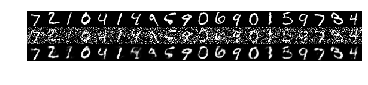

In [57]:
from PIL import Image
rows, cols = 1, 20
num = rows * cols
imgs = np.concatenate([x_test[:num], x_test_noisy[:num], decoded_imgs[:num]])
imgs = imgs.reshape((rows * 3, cols, image_size, image_size))
imgs = np.vstack(np.split(imgs, rows, axis=1))
imgs = imgs.reshape((rows * 3, -1, image_size, image_size))
imgs = np.vstack([np.hstack(i) for i in imgs])
imgs = (imgs * 255).astype(np.uint8)
plt.axis('off')
plt.imshow(imgs, interpolation='none', cmap='gray')
Image.fromarray(imgs).save('sresult.png')
plt.show()